In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/digit-recognizer/train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
data_dev=data[0:1000].T
X_dev=data_dev[1:n]
Y_dev=data_dev[0]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
W1=np.random.rand(10,784)-0.5
W1.shape


(10, 784)

In [ ]:
def init_params():
  W1=np.random.rand(10,784)-0.5
  b1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10,10)-0.5
  b2=np.random.rand(10,1)-0.5
  return W1,b1,W2,b2

def ReLU(Z):
  return np.maximum(0,Z)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1,b1,W2,b2,X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 4 ... 4 4 4] [1 2 2 ... 5 4 3]
0.10521951219512195
Iteration:  10
[8 0 9 ... 4 9 0] [1 2 2 ... 5 4 3]
0.23704878048780487
Iteration:  20
[8 0 5 ... 4 9 4] [1 2 2 ... 5 4 3]
0.3343170731707317
Iteration:  30
[8 0 3 ... 4 9 3] [1 2 2 ... 5 4 3]
0.41865853658536584
Iteration:  40
[8 0 3 ... 4 9 3] [1 2 2 ... 5 4 3]
0.4863658536585366
Iteration:  50
[8 2 3 ... 4 9 3] [1 2 2 ... 5 4 3]
0.5373658536585366
Iteration:  60
[1 2 3 ... 4 9 5] [1 2 2 ... 5 4 3]
0.5810243902439024
Iteration:  70
[1 2 3 ... 4 9 5] [1 2 2 ... 5 4 3]
0.6168292682926829
Iteration:  80
[1 2 3 ... 4 9 5] [1 2 2 ... 5 4 3]
0.6464146341463415
Iteration:  90
[1 2 3 ... 4 9 5] [1 2 2 ... 5 4 3]
0.6702682926829269
Iteration:  100
[1 2 3 ... 4 9 8] [1 2 2 ... 5 4 3]
0.6890487804878048
Iteration:  110
[1 2 3 ... 5 9 8] [1 2 2 ... 5 4 3]
0.7056097560975609
Iteration:  120
[1 2 3 ... 5 4 8] [1 2 2 ... 5 4 3]
0.7202195121951219
Iteration:  130
[1 2 3 ... 5 4 8] [1 2 2 ... 5 4 3]
0.7318780487804878
Iteration:  14

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


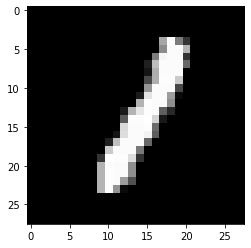

Prediction:  [2]
Label:  2


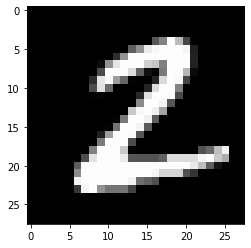

Prediction:  [2]
Label:  2


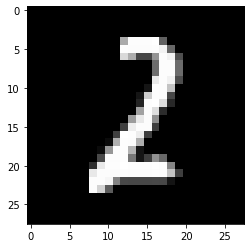

Prediction:  [1]
Label:  1


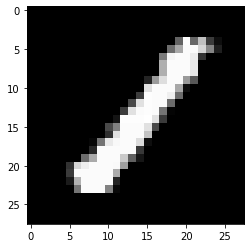

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[2 2 9 2 0 3 9 1 9 2 8 4 9 0 5 8 2 2 4 3 4 1 1 9 9 2 5 6 4 6 7 4 9 4 4 1 2
 6 5 7 1 0 7 6 2 2 7 9 9 8 9 3 7 7 7 8 7 2 8 8 4 4 3 6 4 1 1 8 9 9 7 3 8 5
 6 1 8 7 2 3 4 1 1 3 0 3 1 9 8 5 8 6 5 5 6 2 4 3 4 1 8 2 7 1 0 5 9 1 4 5 7
 9 1 1 1 4 9 4 4 5 1 5 9 6 6 7 5 7 9 0 0 8 6 4 8 6 9 2 7 0 9 9 5 3 0 6 5 8
 5 5 5 4 5 9 8 4 6 1 6 4 9 0 4 9 4 8 8 4 6 6 8 0 5 3 7 3 6 7 6 8 7 8 2 5 6
 1 4 8 6 1 5 8 7 1 3 7 1 8 0 5 7 1 8 6 7 8 6 1 9 1 6 3 1 2 7 8 5 5 5 2 4 5
 8 9 8 3 8 0 0 6 8 5 6 5 8 4 3 8 8 3 1 5 9 0 6 4 4 4 3 2 1 0 1 3 1 3 4 6 9
 9 3 2 6 6 9 1 0 7 0 4 6 1 3 5 8 9 2 8 4 1 4 1 1 4 7 1 0 9 1 9 3 3 0 9 4 4
 4 0 7 1 8 7 0 5 9 8 2 5 8 7 5 4 8 2 7 4 1 5 4 4 8 6 3 3 8 2 1 3 4 5 6 3 6
 1 6 3 0 1 2 8 0 7 5 2 7 9 6 5 1 1 6 7 8 7 3 0 0 4 2 3 4 1 5 6 4 5 7 3 9 8
 4 1 7 1 5 9 9 1 0 1 1 2 3 1 0 1 3 0 1 2 5 1 7 0 3 5 1 3 9 2 7 0 7 7 8 7 6
 7 7 4 4 7 0 0 2 1 6 6 6 6 0 5 0 3 7 2 7 4 9 1 1 8 9 8 2 4 7 4 6 4 9 3 8 3
 8 2 3 5 9 4 1 7 6 2 0 0 0 5 1 4 2 7 8 7 9 9 7 9 1 3 6 7 6 9 0 1 6 5 0 6 1
 0 6 0 8 1 0 8 7 3 3 0 3 

0.843